# 3 Most Common Injuries in Construction (USA)

This project examines a dataset from OSHA regarding occupational safety and health for construction workers. We analyze injuries from 2015, 2016, and 2017. 

We aim to answer simple questions:

- What are the most common kinds of injuries?
- Which of the most common injuries are most fatal?
- Should we focus strictly upon fatal injuries, or balance it with nonfatal?
- Can we determine (in)competence, or should we just investigate causality?
- How do the injuries occur?

We'd like to thank the Kaggle user shipwrekt for putting together the data. Here is a link to his post on Kaggle: https://www.kaggle.com/ruqaiyaship/osha-accident-and-injury-data-1517

This project was done by Sean McGrady.

In [1]:
#We import basic tools & our data, here.
import numpy as np
import pandas as pd
import seaborn as sns


osha_2015_2017 = open("C:/Users/Sean/Desktop/Data Science/OSHA HSE DATA_ALL ABSTRACTS 15-17_FINAL.csv")
osha = pd.read_csv(osha_2015_2017)

In [2]:
#This lets us totally view our columns. We only see 20 of 29 columns, otherwise.
pd.set_option("display.max_columns", None)

# Cleaning Data

We prepare the data for deeper analysis in the cells below. These tasks range from adjusting text to removing unnecessary columns.

In [3]:
#We're converting everything to snake_case.
cols = osha.columns
new_names = []

for name in cols:
    case_change = name.lower()
    space_to_underscore = case_change.replace(" ", "_")
    new_names.append(space_to_underscore)
    

In [4]:
osha.columns = new_names

In [5]:
osha.columns

Index(['summary_nr', 'event_date', 'abstract_text', 'event_description',
       'event_keywords', 'con_end', 'construction_end_use', 'build_stor',
       'building_stories', 'proj_cost', 'project_cost', 'proj_type',
       'project_type', 'degree_of_injury', 'nature_of_inj', 'nature_of_injury',
       'part_of_body', 'part_of_body', 'event_type', 'event_type',
       'evn_factor', 'environmental_factor', 'hum_factor', 'human_factor',
       'task_assigned', 'task_assigned', 'hazsub', 'fat_cause', 'fall_ht'],
      dtype='object')

We're removing the columns indicated below. They are unnecessary for our analysis.

- con_end
- proj_cost
- proj_type
- nature_of_inj
- part_of_body[0]
- event_type[0]
- evn_factor
- hum_factor
- task_assigned
- fat_cause
- hazsub

In [6]:
osha = osha.drop(["con_end", "proj_cost", "proj_type", "nature_of_inj", "evn_factor", "hum_factor", "task_assigned", "fat_cause", "hazsub"], axis=1)


In [7]:
#Duplicate columns require special attention. We cover them in this line & the next.
osha.columns = ["summary_number", "event_date", "abstract", "event_description", "event_keywords", "construction_end_use", "story_of_incident", "total_stories", "project_cost", "project_type", "degree_of_injury", "nature_of_injury", "delete_me_1", "part_of_body", "delete_me_2", "event_type", "environmental_factor", "human_factor", "fall_ht"]

In [8]:
osha = osha.drop(["delete_me_1", "delete_me_2"], axis=1)

In [9]:
osha.head(3)

,summary_number,event_date,abstract,event_description,event_keywords,construction_end_use,story_of_incident,total_stories,project_cost,project_type,degree_of_injury,nature_of_injury,part_of_body,event_type,environmental_factor,human_factor,fall_ht
0,220982664,8/10/2017,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"FINGER,MECHANICAL POWER PRESS,AMPUTATION,GUARD",,0,,,,Nonfatal,"Amputation, Crushing",Fingers,Caught in or between,Catch Point/Puncture Action,Other,0
1,220973937,7/17/2017,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"CAUGHT IN,DRIVE SHAFT,RESIDENTIAL CONSTRUCTION...",Other building,1,1,,Alteration or rehabilitation,Nonfatal,Dislocation,Fingers,Caught in or between,Other,Position Inappropriate For Task,0
2,220967632,6/30/2017,"At 7:30 a.m. on June 30, 2017, an employee was...",EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,"AMPUTATED,EXPLOSION,FIREWORKS",,0,,,,Nonfatal,Fire Burn,Hand,Other,Other,Malfunction In Securing/Warning Op,0


In [10]:
#How many (rows, columns) we have.
osha.shape

(4847, 17)

In [11]:
#We will later use event_keywords for detailed analysis.
osha["event_keywords"] = osha["event_keywords"].apply(lambda x: x.split(","))

In [12]:
#This is a CSV of the cleaned dataframe. 
osha.to_csv("Osha_2015-2017.csv")

This finishes our data preparation.

# Brief Look at Data Granularity

Before we deep-dive into our information, we need to understand it. How fine is this data? Is it fine & specific like grains on a beach, or is it a bit muddy? We have "part_of_body" which plainly tells us the row's injury. We are also fortunate to have an abstract of each entry. Are there more injuries than one per event? The answer is probably yes, but we need to explore & confirm it.

Below we use an example to illustrate the kind of data we're working with.

In [13]:
#This lets us view the columns & briefly investigate data.
osha.head(2)

,summary_number,event_date,abstract,event_description,event_keywords,construction_end_use,story_of_incident,total_stories,project_cost,project_type,degree_of_injury,nature_of_injury,part_of_body,event_type,environmental_factor,human_factor,fall_ht
0,220982664,8/10/2017,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"[FINGER, MECHANICAL POWER PRESS, AMPUTATION, G...",,0,,,,Nonfatal,"Amputation, Crushing",Fingers,Caught in or between,Catch Point/Puncture Action,Other,0
1,220973937,7/17/2017,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"[CAUGHT IN, DRIVE SHAFT, RESIDENTIAL CONSTRUCT...",Other building,1,1,,Alteration or rehabilitation,Nonfatal,Dislocation,Fingers,Caught in or between,Other,Position Inappropriate For Task,0


In [14]:
#We print an abstract to judge how accurate the "part_of_body" column is.
#This is the first abstract if we filter for "Head"
head_bool = osha[osha["part_of_body"] == "Head"]
print(head_bool["abstract"].iloc[0])

At 2:00 p.m. on June 30, 2017, an employee was installing a self-adhering membrane to a roof with a slope of 1.25 feet to 12 feet (vertical to horizontal). As the employee installed the last section of the membranehe determined that it was too wide. He folded over the membrane cap sheet lengthwise and began ripping it with a knife, all while walking backwards. Once the employee reached the edge of the roof, he stood up and inadvertently stepped backwards and fell of the roof. The employee sustained severe head trauma, a collapsed lung, as well as fractures to one of his clavicles and ribs. The employee was taken to a nearby medical facility where he was hospitalized and received treatment. 


# Defining This Project's Scope

Though we're investigating this data by emphasizing individual injuries, it's important to realize that multiple injuries can occur per event, making this data not-so-granular. In the abstract above, we could easily classify this as many injuries. The principle organizers of this data chose "Head" as the emphasis, though. 

We take it to mean descriptive injury is the most severe or noteworthy injury sustained out of a list of injuries. Our MVP (minimum viable product) is going to trust the keywords and chosen injuries as the leading injuries in a given event. A great follow-up to this would break down abstracts by word, make lists of injuries with reference to a key list, and categorize from there.

# What kinds of injuries are most common?

Here we examine the most common injuries. You may skip to the graph if you'd like a visual. Otherwise, our proofs are below.

In [15]:
osha["part_of_body"].value_counts()

Head                    1023
Whole Body               555
Fingers                  550
Internal Injuries        403
Heart                    374
Ribs                     305
Left Leg                 275
Hand                     212
Neck                     157
Feet                     124
Lungs (Puncture)         106
Shoulder                 102
Back                      87
Abdomen                   81
Arm                       72
Face                      72
Hip                       67
Lower Leg                 65
Wrist                     47
Multiple                  27
Femur                     26
Forearm                   25
Knee                      24
Lungs (Asphyxiation)      20
0                         15
Right Eye                 13
Liver                      9
Elbow                      7
Kidney                     2
Name: part_of_body, dtype: int64

In [16]:
#We abbreviate "Internal Injuries" for ease of viewing.
osha['part_of_body'] = osha["part_of_body"].replace(['Internal Injuries'],'Internal Inj.')

# Do we clean this?

Before we tidy this up and create a nice pie chart for reference, we have an important note.

- Note: We have 0 as a body part. We don't know what this means, so let's check it out.

In [17]:
osha[osha["part_of_body"] == "Whole Body"]

,summary_number,event_date,abstract,event_description,event_keywords,construction_end_use,story_of_incident,total_stories,project_cost,project_type,degree_of_injury,nature_of_injury,part_of_body,event_type,environmental_factor,human_factor,fall_ht
5,220974562,6/22/2017,"At 9:07 a.m. on June 22, 2017, an employee was...",EMPLOYEE FAINTS WHILE SORTING CROP IN AIR-COND...,"[UNCONSCIOUSNESS, FAINTED, HEAT EXHAUSTION, HEAT]",,0,,,,Nonfatal,Serious Fall/Strike,Whole Body,Other,Other,Other,0
8,220959944,5/31/2017,"At 5:15 p.m. on May 31, 2017, an employee was ...",EMPLOYEE FALLS THROUGH SKYLIGHT AND IS KILLED,"[FALL, HEAD, ROOF, FLOOR OPENING]",Sewer/water treatment plant,2,2,"$5,000,000 to $10,000,000",Alteration or rehabilitation,Fatal,Serious Fall/Strike,Whole Body,Fall (from elevation),Other,Other,0
17,220960041,5/30/2017,"At 6:00 p.m. on May 30, 2017, an employee was ...",EMPLOYEE FOUND UNRESPONSIVE IN FIELD DIES FROM...,"[AGRICULTURE, HEAT EXHAUSTION, HEAT]",,0,,,,Fatal,Heat Exhaustion,Whole Body,Other,Temperature +/- Tolerance Lev.,Other,0
27,220960892,5/25/2017,"At 3:15 p.m. on May 25, 2017, two employees we...",EMPLOYEE IS KILLED IN EXPLOSION AND FIRE,"[TRENCH, COMBUSTIBLE LIQUID, CRUDE OIL, EXPLOS...",Pipeline,0,,,Alteration or rehabilitation,Fatal,Fire Burn,Whole Body,Other,Other,Other,0
28,220959340,5/24/2017,"At approximately 10:48 on May 24, 2017, Employ...",TWO WORKERS ARE KILLED AND ANOTHER HOSPITALIZE...,"[SODIUM HYPOCHLORITE, EXPLOSION, AIR PRESSURE,...",,0,,,,Fatal,Serious Fall/Strike,Whole Body,Other,Overpressure/Underpressure,"Misjudgment, Hazardous Situation",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,220778179,7/2/2015,"At approximately 2:30 p.m. on July 2, 2015, Em...",EMPLOYEE DIES FROM NATURAL CAUSES,[COLLAPSE],,0,,,,Fatal,Serious Fall/Strike,Whole Body,Other,Other,Other,0
4838,220778286,7/2/2015,"At 8:00 a.m. on July 2, 2015, an employee was ...",EMPLOYEE DROWNS WHEN TRACTOR ROLLS OVER INTO L...,"[CAUGHT IN, TRACTOR, RIVER, CONSTRUCTION VEHIC...",,0,,,Maintenance or repair,Fatal,Serious Fall/Strike,Whole Body,Caught in or between,Other,"Misjudgment, Hazardous Situation",0
4842,220778856,7/1/2015,"At approximately 9:15 a.m. on July 1, 2015, Em...","EMPLOYEE FALLS FROM BILLBOARD, SUSTAINS TRAUMA...","[FALL, LOST BALANCE, LADDER]",,0,,,,Fatal,Head Trauma,Whole Body,Fall (from elevation),Other,Perception Malfunction Task-Environment,0
4844,220778112,7/1/2015,"At 3:00 p.m. on July 1, 2015, an employee was ...",EMPLOYEE FOUND UNRESPONSIVE BY HOME OWNER DURI...,[UNCONSCIOUSNESS],,0,,,,Fatal,Serious Fall/Strike,Whole Body,Other,Other,Other,0


# Body Part "0"

Body part "0" seems to be an other category. The circumstances for each injury are different. We're going to include it in our data for completion, and respect for the injuries acquired. It also might be helpful later to check its columns. For example, "event_keywords" would help us identify "whole body injuries" even though it isn't recorded as such.

In [18]:
#We take the top 6 most common injuries.
osha["part_of_body"].value_counts().head(6)

Head             1023
Whole Body        555
Fingers           550
Internal Inj.     403
Heart             374
Ribs              305
Name: part_of_body, dtype: int64

In [19]:
#And what percentage they take out of the whole dataset.
osha["part_of_body"].value_counts(normalize=True).head(6).sum()

0.6625386996904025

The top 6 injuries are 2/3rds of injuries. We make this digestible in the graph below.

In [20]:
#Here we create a dictionary to prepare our pie chart. Anything below top 10 becomes "Other"
body_part_dict = dict(osha["part_of_body"].value_counts().head(6))
top_6_body_parts = {y:x for x,y in body_part_dict.items()}
top_6_body_parts = list(top_6_body_parts.values())
body_part_dict["Other"] = 0

In [21]:
for entry in osha["part_of_body"]:
    if entry not in top_6_body_parts:
        body_part_dict["Other"] += 1

In [22]:
#Everything here is correct except for "Other."
body_part_dict

{'Head': 1023,
 'Whole Body': 555,
 'Fingers': 550,
 'Internal Inj.': 403,
 'Heart': 374,
 'Ribs': 305,
 'Other': 1637}

In [23]:
#This is a check for the sum of body part counts and the sum of top 6 body part counts + Other. They should be equal.
sum(body_part_dict.values()) == osha["part_of_body"].value_counts().sum()

False

For some reason, our Other count came out 2 higher than it should have. Though I did not find the mistake in the code above, this is an easy fix in code below.

In [24]:
body_part_dict["Other"] -= 2

In [25]:
#The same check from above to confirm we fixed the issue.
sum(body_part_dict.values()) == osha["part_of_body"].value_counts().sum()

True

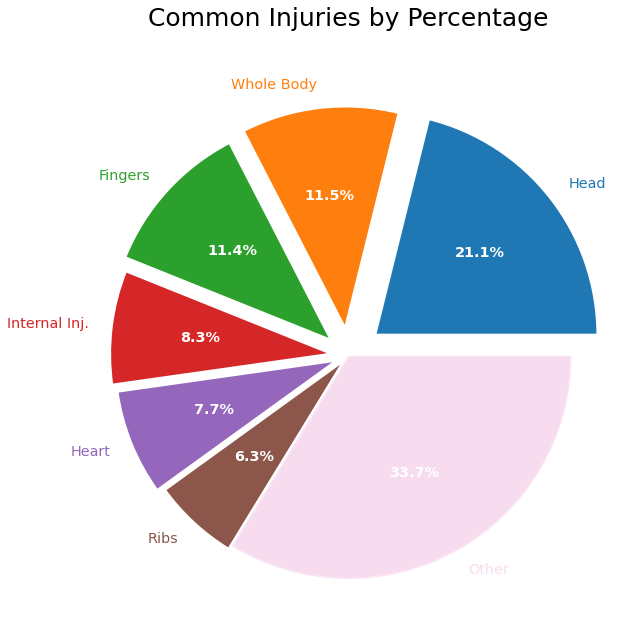

In [26]:
#This code produces the pie chart we've been coding for.
import matplotlib.pyplot as plt

labels = []
counts = []

for x, y in body_part_dict.items():
    labels.append(x)
    counts.append(y)
    
#We use plt.subplots to enable aesthetic improvement.
plt.rcParams["figure.figsize"] = (10,40)
fig, ax = plt.subplots()


#Get elements produced by ax.pie
patches, texts, pcts = ax.pie(counts, labels=labels,autopct='%.1f%%',
      wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
      textprops={'size': 'x-large'},
      explode=[0.15,0.12,0.1,0.07,0.05,0.02,0])

#Set percentages white to match the background.
plt.setp(pcts, color='white', fontweight='bold')

#Set Other to be transparent, that way we can focus on the specific data.
patches[6].set_alpha(0.25)

#Sets label text color equal to the corresponding pie color.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

ax.set_title("Common Injuries by Percentage", fontsize=25, y=1.08)
plt.show()
plt.close()

# Common Injury Summary

Head injuries are by far most common at 21.1%. In other words, about 1/5th of all injuries go to the head. Whole body and fingers are essentially tied at 11.4% and 11.5%. While these 3 produce over 40% of injuries, we need to further investigate the lethality of these 6 injuries before we can focus on a specific set. We might gain more by preventing internal injuries than whole body injuries, for example.

# Weighing Injuries by Frequency

Since we have limited time & resources, we score the top 3 most common injuries by their frequencies. We have deliberately written out a formula for this below for a few reasons.

Our study treats fatal & nonfatal accidents as the same. Is this really the case? We originally measured fatalities as 1/3rd more valuable because death is the most punishing outcome. It is the most tragic for individuals & communities, and the most costly for a business. 

The top 3 did not change as a result. We reverted back to a 1x scoring for fatal & nonfatal counts to make the graph below more intuitive. For people who would like to experiment with weighting fatal & nonfatal accidents, you may easily do this by changing the designated script below. 

Perhaps you think fatalities should count twice as much as nonfatalities? Or perhaps you'd like to focus on nonfatalities? This formula can scale with your needs using slight tweaks.

The formula:

(N_fatalities * 1.0) + (N_non_fatalities * 1.0) = score

In [27]:
fatal_injuries = osha[osha["degree_of_injury"] == "Fatal"]

In [28]:
nonfatal_injuries = osha[osha["degree_of_injury"] == "Nonfatal"]

In [29]:
fatal_dict = dict(fatal_injuries["part_of_body"].value_counts())
nonfatal_dict = dict(nonfatal_injuries["part_of_body"].value_counts())

In [30]:
#This is our scoring script. You may alter the 1.0 values by the fatal or nonfatal dictionaries to modify their weight.
scores = {}

for entry in top_6_body_parts:
    score = round((fatal_dict[entry] * 1.0) + (nonfatal_dict[entry] * 1.0))
    scores[entry] = score

In [31]:
#We sort scores in code below.

scorelist = sorted(scores.items(), key=lambda x:x[1])
scores = dict(scorelist)
print(scores)

{'Ribs': 305, 'Heart': 374, 'Internal Inj.': 403, 'Fingers': 550, 'Whole Body': 555, 'Head': 1023}


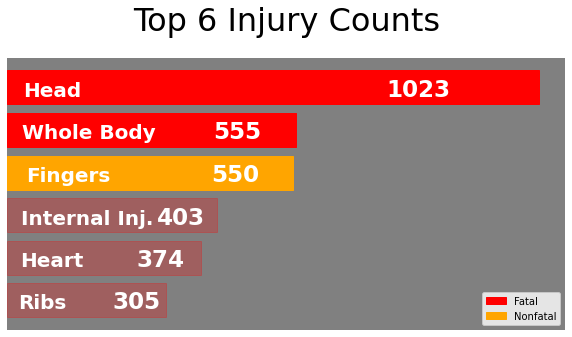

In [32]:
import matplotlib.patches as mpatches

bar_labels = []
bar_counts = []

for x, y in scores.items():
    bar_labels.append(x)
    bar_counts.append(y)

plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots(1, 1)

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

score_graph = plt.barh(bar_labels, bar_counts)
score_graph[0].set_color("red")
score_graph[0].set_alpha(0.25)
score_graph[1].set_color("red")
score_graph[1].set_alpha(0.25)
score_graph[2].set_color("red")
score_graph[2].set_alpha(0.25)
score_graph[3].set_color("orange")
score_graph[4].set_color("red")
score_graph[5].set_color("red")


ax.text(bar_counts[0]/1.5, -0.18, "{}".format(bar_counts[0]), size=23, color="white", fontweight="bold")
ax.text(bar_counts[0]/15, -0.18, "{}".format(bar_labels[0]), size=20, color="white", fontweight="bold")


ax.text(bar_counts[1]/1.5, 0.80, "{}".format(bar_counts[1]), size=23, color="white", fontweight="bold")
ax.text(bar_counts[1]/15, 0.8, "{}".format(bar_labels[1]), size=20, color="white", fontweight="bold")


ax.text(bar_counts[2]/1.4, 1.8, "{}".format(bar_counts[2]), size=23, color="white", fontweight="bold")
ax.text(bar_counts[2]/15, 1.8, "{}".format(bar_labels[2]), size=20, color="white", fontweight="bold")


ax.text(bar_counts[3]/1.4, 2.8, "{}".format(bar_counts[3]), size=23, color="white", fontweight="bold")
ax.text(bar_counts[3]/15, 2.8, "{}".format(bar_labels[3]), size=20, color="white", fontweight="bold")

ax.text(bar_counts[4]/1.4, 3.8, "{}".format(bar_counts[4]), size=23, color="white", fontweight="bold")
ax.text(bar_counts[4]/20, 3.8, "{}".format(bar_labels[4]), size=20, color="white", fontweight="bold")

ax.text(bar_counts[5]/1.4, 4.8, "{}".format(bar_counts[5]), size=23, color="white", fontweight="bold")
ax.text(bar_counts[5]/33, 4.8, "{}".format(bar_labels[5]), size=20, color="white", fontweight="bold")

red_patch = mpatches.Patch(color='red', label='Fatal')
orange_patch = mpatches.Patch(color="orange", label="Nonfatal")
plt.legend(handles=[red_patch, orange_patch])

ax.set_facecolor("gray")
plt.xticks([])
plt.yticks("")
ax.set_title("Top 6 Injury Counts", size=32, y=1.08)
plt.show()
plt.close()

Head, whole body, and fingers are going to be our targets. We see that finger & whole body injuries are fairly close in frequency, but head injuries are most common by an order of magnitude. This makes sense with our pie chart from above.

# Assessing Competence Through the Human Factor Column

We now know what to investigate: head, whole body, and fingers. We assess these injuries' happenstances to recommend changes, or at least bring this information to ergonomic experts. 

However, it's possible that some events had good standards are already in place, and that these injuries were the result of incompetence. We can present & filter that with the "Human Factor" column to some degree if it is representative of our dataset. 

If we are unable to determine whether the injury is due to incompetence or not, we will shift to event keywords.

In [33]:
#We get basic filters ready for our 3 injuries.
head_bool = osha[osha["part_of_body"] == "Head"]
whole_body_bool = osha[osha["part_of_body"] == "Whole Body"]
fingers_bool = osha[osha["part_of_body"] == "Fingers"]

In [34]:
#This gives basic organization to the data below.
print("------------\nHead: Top 4 Human Factors\n------------")
print(head_bool["human_factor"].value_counts().head(4),"\n------------")
print("Sum of Reported Human Factors: Head Injuries: {}\n------------".format(head_bool["human_factor"].value_counts().sum()))
print("Whole Body: Top 4 Human Factors\n------------")
print(whole_body_bool["human_factor"].value_counts().head(4),"\n------------")
print("Sum of Reported Human Factors: Whole Body Injuries: {}\n------------".format(whole_body_bool["human_factor"].value_counts().sum()))
print("Fingers: Top 4 Human Factors\n------------")
print(fingers_bool["human_factor"].value_counts().head(4),"\n------------")
print("Sum of Reported Human Factors: Finger Injuries: {}\n------------".format(fingers_bool["human_factor"].value_counts().sum()))

------------
Head: Top 4 Human Factors
------------
Other                                358
Misjudgment, Hazardous Situation     315
Safety Devices Removed/Inoperable     59
Position Inappropriate For Task       46
Name: human_factor, dtype: int64 
------------
Sum of Reported Human Factors: Head Injuries: 1022
------------
Whole Body: Top 4 Human Factors
------------
Other                                    249
Misjudgment, Hazardous Situation         149
Safety Devices Removed/Inoperable         29
Equipment Inappropriate For Operation     21
Name: human_factor, dtype: int64 
------------
Sum of Reported Human Factors: Whole Body Injuries: 555
------------
Fingers: Top 4 Human Factors
------------
Misjudgment, Hazardous Situation           185
Other                                      115
Safety Devices Removed/Inoperable           65
Insufficient /Lack/Engineering Controls     40
Name: human_factor, dtype: int64 
------------
Sum of Reported Human Factors: Finger Injuries: 550
---

# We Won't Use Human Factor, So Shift to Keywords

Our sums are equal, or nearly equal, to the amount rows under their respective injury. This means almost every row measured has an entry, giving us full representation for "Human Factor."

However, "Other" takes significant amounts of the Human Factor category for each injury we've measured. This makes analysis a lot trickier. Instead of using the Human Factor column, we must use the event_keyword column. This allows us to be more precise about causation, though we have a harder time confirming competence since we can't rely upon the intended column for it.

We also don't posses fine data about each injury's location. The exception to this is falling events. We have some information about stories.

- We could proceed with proceed with "Misjudgment, Hazardous Situation". That's a clear marker for competence. We'd like to cast the widest net possible, though, so we'll ignore it in favor of event keywords. 

- A good follow-up to this initial project would parse through the abstract of every row, generating locations wherever possible, and getting a better understanding of the "Other" category. Again: That is outside of this project's scope. Our goal is to provide a foundational perspective to build from.

In [35]:
#We later turn these lists into sets.
head_word_list = []
fingers_word_list = []
whole_body_word_list = []

In [36]:
def head_word_generator(column_list):
    for word in column_list:
        head_word_list.append(word)
        
def fingers_word_generator(column_list):
    for word in column_list:
        fingers_word_list.append(word)
        
def whole_body_word_generator(column_list):
    for word in column_list:
        whole_body_word_list.append(word)

In [37]:
#These distribute vocabulary into lists. In the 3 cells below, we make them into sets.
head_list_generation = head_bool["event_keywords"].apply(head_word_generator)
fingers_list_generation = fingers_bool["event_keywords"].apply(fingers_word_generator)
whole_body_word_generation = whole_body_bool["event_keywords"].apply(whole_body_word_generator)

In [38]:
head_word_set = set(head_word_list)

In [39]:
fingers_word_set = set(fingers_word_list)

In [40]:
whole_body_word_set = set(whole_body_word_list)

# Summary of Relevant Keywords per Injury

We created sets holding each unique word in event_keywords per injury. Now, we assess their counts with a bar graph & make their relative frequencies more intuitive with a wordcloud. There are a few important notes about using such a strategy:

- The bar graph will help us gauge specific numbers for each event count, although we can only display a few words. If we displayed them all, the graph would be cluttered. The top X words might also have redundancies which muddle understanding (example: amputation & amputated conveying the same message, yet taking 2 spots on the graph). This possibility should be rare, but it also means we might need to look past a few top words. It depends on the result.

- Wordclouds are good at helping us assess relative frequencies of one word to others. We won't have absolute numbers, but we will encompass the entire vocabulary. This will help us choose our direction for each injury and get around the problem highlighted in our first bullet.

We set out to make these displays below. You may skip to the graphs & titled text if you wish to skip the programming.

In [41]:
#We use these functions to count words inside specific injury columns.

head_keyword_count = {}
finger_keyword_count = {}
wb_keyword_count = {}

def head_keyword_counter(entry):
    for element in entry:
        if element in head_keyword_count:
            head_keyword_count[element] += 1
        else:
            head_keyword_count[element] = 1
                
def finger_keyword_counter(entry):
    for element in entry:
        if element in finger_keyword_count:
            finger_keyword_count[element] += 1
        else:
            finger_keyword_count[element] = 1
                
def wb_keyword_counter(entry):
    for element in entry:
        if element in wb_keyword_count:
            wb_keyword_count[element] += 1
        else:
            wb_keyword_count[element] = 1

In [42]:
#This is the dictionary for event keyword counts for head injuries.
head_bool["event_keywords"].apply(head_keyword_counter)
head_keyword_list = sorted(head_keyword_count.items(), key=lambda x:x[1], reverse=True)
head_keywords = dict(head_keyword_list)

In [43]:
#This is the dictionary for event keyword counts for whole body injuries.
whole_body_bool["event_keywords"].apply(wb_keyword_counter)
wb_keyword_list = sorted(wb_keyword_count.items(), key=lambda x:x[1], reverse=True)
wb_keywords = dict(wb_keyword_list)

In [44]:
#This is the dictionary for event keyword counts for finger injuries.
fingers_bool["event_keywords"].apply(finger_keyword_counter)
finger_keyword_list = sorted(finger_keyword_count.items(), key=lambda x:x[1], reverse=True)
finger_keywords = dict(finger_keyword_list)

In [45]:
#Labels & counts for our bar graphs and wordclouds.
head_keyword_labels = []
head_keyword_counts = []
wb_keyword_labels = []
wb_keyword_counts = []
finger_keyword_labels = []
finger_keyword_counts = []

#Filling our labels & counts for our bar graphs & wordclouds.
for x, y in head_keywords.items():
    head_keyword_labels.append(x)
    head_keyword_counts.append(y)
    
for x, y in wb_keywords.items():
    wb_keyword_labels.append(x)
    wb_keyword_counts.append(y)
    
for x, y in finger_keywords.items():
    finger_keyword_labels.append(x)
    finger_keyword_counts.append(y)

#Making our dataframes for our bar graphs.
head_seaborn_df = pd.DataFrame({"label":head_keyword_labels,"counts":head_keyword_counts}).head(6)
wb_seaborn_df = pd.DataFrame({"label":wb_keyword_labels,"counts":wb_keyword_counts}).head(6)
finger_seaborn_df = pd.DataFrame({"label":finger_keyword_labels,"counts":finger_keyword_counts}).head(6)

# Most Frequent Event Keyword Graphs: Head Injuries

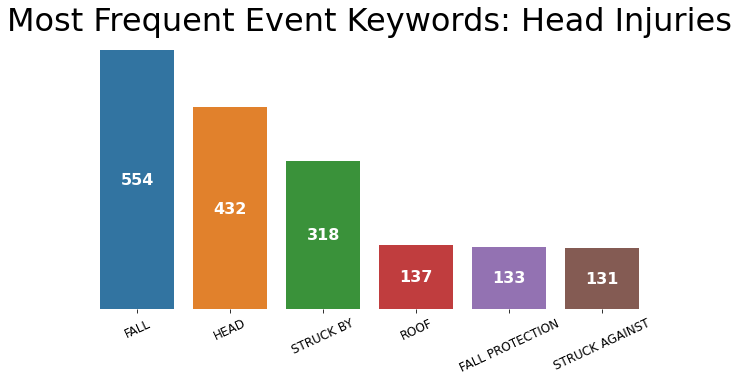

In [46]:
fig, ax = plt.subplots(1, 1)

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

shead = sns.barplot(x="label",y="counts",data=head_seaborn_df, orient="v", ax=None)
plt.bar_label(shead.containers[0], size=16, label_type="center", color="white", weight="bold")
plt.title("Most Frequent Event Keywords: Head Injuries", size=32)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.xticks(size=12, rotation = 25)
plt.show()

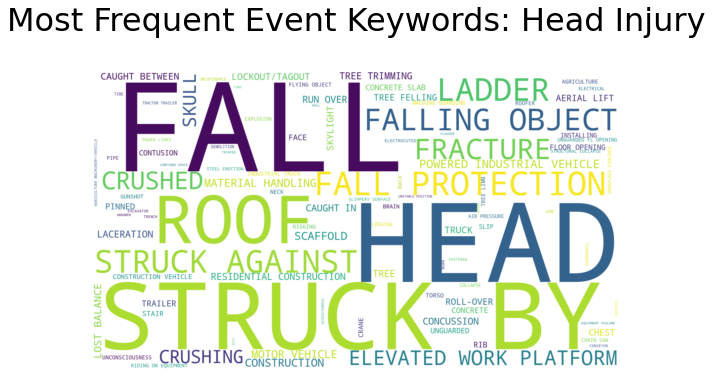

In [47]:
from wordcloud import WordCloud

wc_head = WordCloud(background_color="white",
                    width=1600,
                    height=900,
                    max_words=100,
                    normalize_plurals=False).generate_from_frequencies(head_keywords)

plt.axis("off")
plt.imshow(wc_head,interpolation="bilinear")
plt.title("Most Frequent Event Keywords: Head Injury", size=32, y=1.12)
plt.tight_layout(pad = 0)

# Head Injury Keyword Analysis

- Head injuries are mostly a result of falling. Falling is far and away the most common cause of injuries, probably from a roof or ladder. Secondary reasons are getting struck by something, or crushed. "Fall" is the clear target for investigation.

# Most Frequent Event Keyword Graphs: Whole Body Injuries

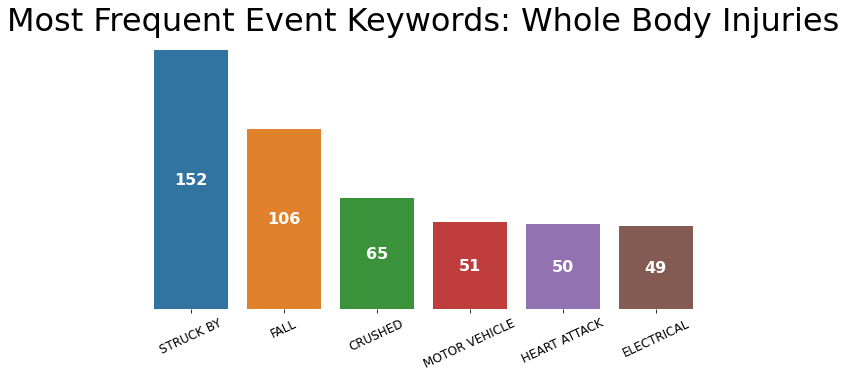

In [48]:
fig, ax = plt.subplots(1, 1)

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

swb = sns.barplot(x="label",y="counts",data=wb_seaborn_df, orient="v", ax=None)
plt.bar_label(swb.containers[0], size=16, label_type="center", color="white", weight="bold")
plt.title("Most Frequent Event Keywords: Whole Body Injuries", size=32)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.xticks(size=12, rotation = 25)
plt.show()

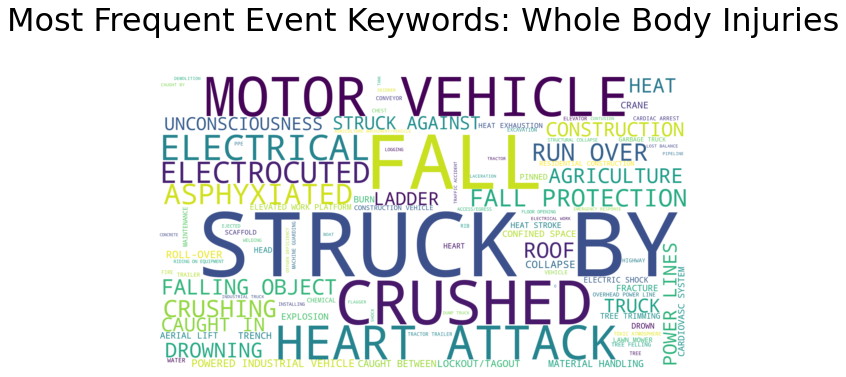

In [49]:
wc_wb = WordCloud(background_color="white",
                    width=1600,
                    height=900,
                    max_words=100,
                    normalize_plurals=False).generate_from_frequencies(wb_keywords)

plt.axis("off")
plt.imshow(wc_wb,interpolation="bilinear")
plt.title("Most Frequent Event Keywords: Whole Body Injuries", size=32, y=1.12)
plt.tight_layout(pad = 0)

# Whole Body Injury Keyword Analysis

- Fall & struck by are both quite common for whole body injuries, with struck by being more common and likely by a motor vehicle. There is more uniformity in this distribution of word counts-- we see that from the relatively comparable sizes of each word. We will use "struck by" in our statistical analysis in the next section. It is noteworthy that some solutions to head injuries' fall category may apply here, and that might boost the relevance of studying falls. We leave this to more dedicated experts.

- It's worth noting that run over, crushing, crushed, powered vehicle, motor vehicle, and roll-over seem to be related to vehicle accidents, but falling object is another point of inquiry related to being struck. It's also worth noting that heart attacks are high on this list as well.

# Most Frequent Event Keyword Graphs: Finger Injuries

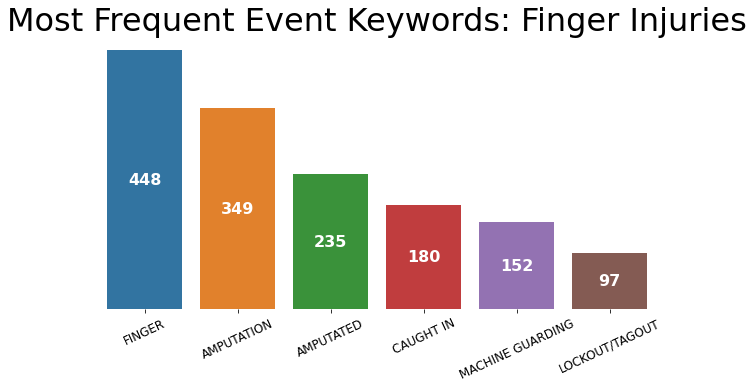

In [50]:
fig, ax = plt.subplots(1, 1)

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

sfinger = sns.barplot(x="label",y="counts",data=finger_seaborn_df, orient="v", ax=None)
plt.bar_label(sfinger.containers[0], size=16, label_type="center", color="white", weight="bold")
plt.title("Most Frequent Event Keywords: Finger Injuries", size=32)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.xticks(size=12, rotation = 25)
plt.show()

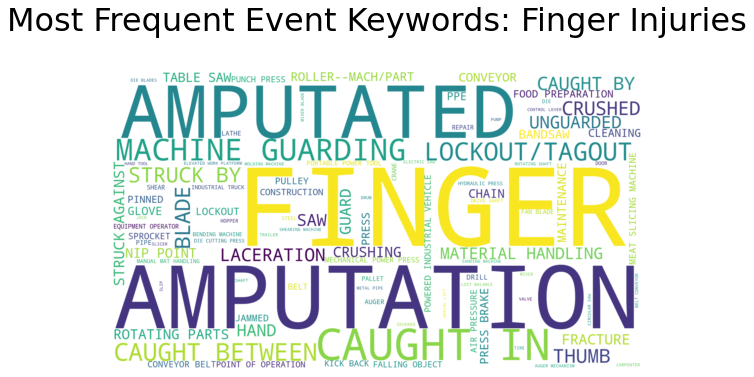

In [51]:
wc_fingers = WordCloud(background_color="white",
                    width=1600,
                    height=900,
                    max_words=100,
                    normalize_plurals=False).generate_from_frequencies(finger_keywords)

plt.axis("off")
plt.imshow(wc_fingers,interpolation="bilinear")
plt.title("Most Frequent Event Keywords: Finger Injuries", size=32, y=1.12)
plt.tight_layout(pad = 0)

# Finger Injury Keyword Analysis

- Finger injuries seem to be a result of emergency amputations on-site, or sustaining a severe injury which results in an amputation at the hospital. We investigated several finger injury events under event_description. Amputation was often done by an employee who caught a finger in/between/by something, as the wordcloud alludes. "Amputated" and "amputation" entries will be combined and investigated in the cells below.

# Summary Preparation of Head, Whole Body, and Finger Injury Causes

These results make sense. Our next goal is to use conditional probability to answer practical questions for people in the construction business, or aspiring to join it. 

"What is the chance a worker will injure his X given Y circumstances?"

To answer this question for the US population at large, we researched another statistic from OSHA. We discovered it from a blog post from Rachel Burger. The link is here: https://blog.capterra.com/13-shocking-construction-injury-statistics/

One in ten construction workers are injured each year. That's both fatal & nonfatal. While this statistic was published in 2014, we think this is close enough to use for the 2015-2017 dataset.

We make new dataframes below to answer the following questions that will help us summarize all of our findings thus far:

- If you're a construction worker, what's the % chance you'll get X injury?
- If you're a construction worker, what's the % chance you get X injury from Y?
- How much of the total injuries does X make up?
- How much of the total injuries does X given Y make up?
- How much of X injury does Y event take?

For ease of reading, we will repost the printed answers in a clean markup cell. Unless you want to check our work, skip to the summary.

In [52]:
#These become new dataframes which house injuries by their most common event keyword.
#cw = construction worker
head_fall_df = pd.DataFrame()
fingers_amputation_df = pd.DataFrame()
wb_struck_by_df = pd.DataFrame()
cw_inj_chance = 1/10
total_inj_counts = len(osha)

In [53]:
#This cell and the next 2 cells filter the boolean filters even further, adding information to the dataframes above.
for i in range(len(head_bool.index)):
    count = 0 + i
    for entry in head_bool["event_keywords"].iloc[[count]]:
        if "FALL" in entry:
            head_fall_df = pd.concat([head_fall_df, head_bool["event_keywords"].iloc[[count]]])

In [54]:
for i in range(len(whole_body_bool.index)):
    count = 0 + i
    for entry in whole_body_bool["event_keywords"].iloc[[count]]:
        if "STRUCK BY" in entry:
            wb_struck_by_df = pd.concat([wb_struck_by_df, whole_body_bool["event_keywords"].iloc[[count]]])

In [55]:
for i in range(len(fingers_bool.index)):
    count = 0 + i
    for entry in fingers_bool["event_keywords"].iloc[[count]]:
        if "AMPUTATED" or "AMPUTATION" in entry:
            fingers_amputation_df = pd.concat([fingers_amputation_df,fingers_bool["event_keywords"].iloc[[count]]])

In [56]:
#Counts of head injuries-- falling, then total
head_inj_fall_counts = len(head_fall_df)
head_inj_counts = len(head_bool)

#A construction worker's chance of whole body injury, and wb struck by.
head_inj_chance = 100 * (round(cw_inj_chance * (head_inj_counts / total_inj_counts), 4))
head_inj_falling_chance = 100 * (round(cw_inj_chance * (head_inj_fall_counts / total_inj_counts), 5))

#A percentage of all reported construction injuries, head and head given falling.
head_inj_perc = round((100 * (head_inj_counts / total_inj_counts)), 2)
head_inj_fall_perc = round((100 * (head_inj_fall_counts / total_inj_counts)), 2)

#Percentage of head injuries were falls
fall_perc_head_inj = 100 * round((head_inj_fall_counts / head_inj_counts), 2)

print("If you were a construction worker in 2015-2017, you had a {}% chance to injure your head.".format(head_inj_chance))
print("If you were a construction worker in 2015-2017, you had a {}% chance to injure your head by falling.".format(head_inj_falling_chance))
print("{}% of all construction injuries were head injuries.".format(head_inj_perc))
print("{}% of all construction injuries were head injuries given they were falls.".format(head_inj_fall_perc))
print("{}% of head injuries were from falls.".format(fall_perc_head_inj))

If you were a construction worker in 2015-2017, you had a 2.11% chance to injure your head.
If you were a construction worker in 2015-2017, you had a 1.143% chance to injure your head by falling.
21.11% of all construction injuries were head injuries.
11.43% of all construction injuries were head injuries given they were falls.
54.0% of head injuries were from falls.


In [57]:
#Counts of whole body injuries-- struck by, then total
wb_inj_struckby_counts = len(wb_struck_by_df)
wb_inj_counts = len(whole_body_bool)

#A construction worker's chance of whole body injury, and whole body struck by injury.
wb_inj_chance = 100 * (round(cw_inj_chance * (wb_inj_counts / total_inj_counts), 4))
wb_inj_struckby_chance = 100 * (round(cw_inj_chance * (wb_inj_struckby_counts / total_inj_counts), 4))

#A percentage of all reported construction injuries, whole body and whole body struck by.
wb_inj_perc = round(100 * (wb_inj_counts/total_inj_counts), 2)
wb_inj_struckby_perc = round(100 * (wb_inj_struckby_counts / total_inj_counts), 2)

#Percentage of wb injuries were struck by
struckby_perc_wb_inj = 100 * round((wb_inj_struckby_counts / wb_inj_counts), 2)

print("If you were a construction worker in 2015-2017, you had a {}% chance to injure your whole body.".format(wb_inj_chance))
print("If you were a construction worker in 2015-2017, you had a {}% chance to injure your whole body by getting struck.".format(wb_inj_struckby_chance))
print("{}% of all construction injuries were whole body injuries.".format(wb_inj_perc))
print("{}% of all construction injuries injuries were whole bodies getting struck.".format(wb_inj_struckby_perc))
print("{}% of whole body injuries were from getting struck.".format(struckby_perc_wb_inj))

If you were a construction worker in 2015-2017, you had a 1.15% chance to injure your whole body.
If you were a construction worker in 2015-2017, you had a 0.31% chance to injure your whole body by getting struck.
11.45% of all construction injuries were whole body injuries.
3.14% of all construction injuries injuries were whole bodies getting struck.
27.0% of whole body injuries were from getting struck.


In [58]:
#Counts for finger injuries & finger amputations
finger_inj_amp_counts = len(fingers_amputation_df)
finger_inj_counts = len(fingers_bool)

#Chance of finger injury & finger injury by amputation
finger_inj_chance = 100 * (round(cw_inj_chance * (finger_inj_counts / total_inj_counts), 4))
finger_inj_amp_chance = 100 * (round(cw_inj_chance * (finger_inj_amp_counts / total_inj_counts), 4))

#Finger injuries, and finger injuries by amputation, as percentages of total injuries
finger_inj_perc = round(100 * (finger_inj_counts / total_inj_counts), 2)
finger_inj_amp_perc = round(100 * (finger_inj_amp_counts / total_inj_counts), 2)

#Amputations as a percentage of finger injuries
amp_perc_finger_inj = round(100 * (finger_inj_amp_counts / finger_inj_counts), 2)

print("If you were a construction worker in 2015-2017, you had a {}% chance to injure your finger.".format(100 * (round(cw_inj_chance * (finger_inj_counts / total_inj_counts), 4))))
print("If you were a construction worker in 2015-2017, you had a {}% chance to amputate your finger in some manner.".format(100 * (round(cw_inj_chance * (finger_inj_amp_counts / total_inj_counts), 4))))
print("{}% of all construction injuries were finger injuries.".format(finger_inj_perc))
print("{}% of all construction injuries injuries were finger amputations.".format(finger_inj_amp_perc))
print("{}% of finger injuries were amputations.".format(amp_perc_finger_inj))

If you were a construction worker in 2015-2017, you had a 1.13% chance to injure your finger.
If you were a construction worker in 2015-2017, you had a 1.13% chance to amputate your finger in some manner.
11.35% of all construction injuries were finger injuries.
11.35% of all construction injuries injuries were finger amputations.
100.0% of finger injuries were amputations.


In [59]:
top_3_total_inj_perc = 100 * round(((finger_inj_counts + wb_inj_counts + head_inj_counts) / total_inj_counts), 2)
top_3_total_inj_event_perc = 100 * round(((finger_inj_amp_counts + wb_inj_struckby_counts + head_inj_fall_counts) / total_inj_counts), 2)

print("Finger, whole body, and head injuries made up {}% of injuries from 2015-2017".format(top_3_total_inj_perc))
print("Amputations, being struck, and falls made up {}% of injury events from 2015-2017".format(top_3_total_inj_event_perc))

Finger, whole body, and head injuries made up 44.0% of injuries from 2015-2017
Amputations, being struck, and falls made up 26.0% of injury events from 2015-2017


# Summary

Construction workers are beset by many injuries. Head injuries, finger injuries, and whole body injuries are the most common. Finger injuries are not fatal, but numerous enough we investigated them alongside fatal injuries.

Falling is the most common reason for head injuries. Amputation is the only common event for finger injury. Being struck is the most common cause of whole body injury.

Details: 

Head: 

- If you were a construction worker in 2015-2017, you had a 2.11% chance to injure your head.
- If you were a construction worker in 2015-2017, you had a 1.143% chance to injure your head by falling.
- 21.11% of all construction injuries were head injuries.
- 11.43% of all construction injuries were head injuries given they were falls, meaning 54.0% of head injuries were from falls.

Whole Body: 

- If you were a construction worker in 2015-2017, you had a 1.15% chance to injure your whole body.
- If you were a construction worker in 2015-2017, you had a 0.31% chance to injure your whole body by getting struck.
- 11.45% of all construction injuries were whole body injuries.
- 3.14% of all construction injuries injuries were whole bodies getting struck, meaning 27.0% of whole body injuries were from getting struck.

Fingers:

- If you were a construction worker in 2015-2017, you had a 1.13% chance to injure your finger.
- If you were a construction worker in 2015-2017, you had a 1.13% chance to amputate your finger in some manner.
- 11.35% of all construction injuries were finger injuries.
- 11.35% of all construction injuries injuries were finger amputations, meaning 100.0% of finger injuries were amputations.

Addressing These 3 Injuries and Their Most Common Events:

- Finger, whole body, and head injuries made up 44.0% of injuries from 2015-2017
- Amputations, being struck, and falls made up 26.0% of injury events from 2015-2017


# Recommendations

We recommend health & safety experts focus on preventing the three aforementioned events. Although we have not investigated seasonality, we think it would best be done in conjunction with a follow-up report using a dissection of the abstract column.

- Head Injuries: We recommend some safety policy procedures for workers on rooves and heights. If you must assemble something, it must be on a secure foundation, such as the ground or completed floor. Several individuals fell while tinkering on a roof or high platform. This would require additional trips up & down a latter, or resource pooling time to construct parts in advance before installing them, but it would reduce the frequency of falls.

- Finger Injuries: We recommend that ergonomic engineers not only improve grips, as slipping occurs for many finger injuries, but also create requisite hand placement to activate certain devices. Several saws and other large machines can activate while an employee's hand is carelessly or negligently placed. While it's easy to shift blame to the employee, and perhaps correct, it is possible to design against incompetence and accidents.

- Whole Body Injuries: Many of these injuries & fatalities are a result of negligent driving or positioning. We recommend creating warning systems in advance of these incidents to help employees avoid tragedy, possibly with a sound or some sensual cue.

# Conclusion

If there is sufficient will, we firmly believe we can reduce up to 26% of injuries suffered by American construction workers. We hope this report will inform your team.